In [1]:
from py2neo import Graph

In [2]:
graph = Graph("bolt://localhost:7687", password="123")

#tx = graph.begin()


## Setup

In [202]:
# Delete All Nodes
q = '''
MATCH (n)
DETACH DELETE n
'''
graph.run(q)

In [8]:
#define the index - only run this when you create the graph
q = '''
CREATE CONSTRAINT ON (u:Account) ASSERT u.Name IS UNIQUE;
'''

graph.run(q)

KeyboardInterrupt: 

## Create Graph

In [203]:
greece = [
"Axeloukos",
"BazeGR",
"ControllerByte",
"DD_Warrior_Lady",
"Fonikibekatsa",
"HackyPixelz",
"Oldschool",
"Piperakos",
"SonOfZeus_TV",
"gramers"]

In [205]:
q = '''
LOAD CSV WITH HEADERS FROM "file:/{streamer_name}.csv" AS row
MERGE (user:Account {{Name:row.from_name}})
MERGE (streamer:Account {{Name:row.to_name}})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {{data:datetime(row.followed_at)}}]->(streamer);
'''


#s = '''
#    MATCH (s:Account{{Name:'{name}'}})
#    SET s:Streamer
#    '''

for streamer in greece: #streamers[0:2]:
    qq = q.format(streamer_name=streamer)
    print(qq)
    graph.run(qq)
    #ss = s.format(name=streamer)
    #graph.run(ss)


LOAD CSV WITH HEADERS FROM "file:/Axeloukos.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {data:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/BazeGR.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {data:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/ControllerByte.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {data:datetime(row.followed_at)}]->(streamer);


LOAD CSV WITH HEADERS FROM "file:/DD_Warrior_Lady.csv" AS row
MERGE (user:Account {Name:row.from_name})
MERGE (streamer:Account {Name:row.to_name})
ON MATCH SET streamer:Streamer
CREATE (user)-[:Follows {data:datetime(row.followed_at)}]->(streamer);


LOAD CS

## Count Nodes

In [6]:
x = graph.run('MATCH (n) RETURN count(n)')

In [7]:
x.data()

[{'count(n)': 207485}]

## Other Queries 

In [13]:
! head /Users/jeroen/Downloads/all_followers_top10_greece/Axeloukos.csv

In [ ]:
# create overlap counts
MATCH (s1:Streamer)<-[f1:Follows]-(f:Account)-[f2:Follows]->(s2:Streamer)
WHERE NOT f:Streamer
WITH s1,s2,count(f) as followers
CREATE (s1)-[a:agg{f_count:followers}]->(s2)

In [ ]:
# get views between two streamers
'''
MATCH (s1:Streamer{Name:'SonOfZeus_TV'})<-[:Follows]-(a:Account)-[:Follows]->(s2:Streamer{Name:'Fonikibekatsa'})
WHERE NOT a:Streamer
RETURN s1,s2,a
LIMIT 50;
'''

In [ ]:
# export graph
#CALL apoc.export.graphml.all('/tmp/complete-graph.graphml', {useTypes:true, storeNodeIds:false})
#CALL apoc.export.graphml.query('query',file,config)

## Testing Networkx

In [21]:
x = '''
MATCH (s:Streamer)-[a:agg]->(s2:Streamer)
RETURN s,s2,a
'''

xx = graph.run(x).data()

In [22]:
xx[1]

{'s': (:Account:Streamer {Name: 'Oldschool'}),
 's2': (:Account:Streamer {Name: 'Piperakos'}),
 'a': ()-[:agg {counts: 4868}]->()}

In [23]:
r = 

In [127]:
import networkx as nx
import nxviz as nv
from matplotlib import pyplot as plt
G=nx.Graph()

In [185]:
for xxx in xx:
    name1 = list(xxx.get('s').items())[0][1]
    name2 = list(xxx.get('s2').items())[0][1]
    edge_count = list(xxx.get('a').items())[0][1]    
    G.add_node(name1)
    G.add_node(name2)
    G.add_edge(name1,name2,followers=edge_count)

In [186]:
streamers = ['Oldschool',
  'HackyPixelz',
  'DD_Warrior_Lady',
  'Piperakos',
  'SonOfZeus_TV',
  'Fonikibekatsa',
  'BazeGR',
  'Axeloukos',
  'ControllerByte']

matrix = nx.attr_matrix(G, edge_attr='followers', normalized=True)

for i in range(0,matrix[0].shape[0]):
    for ii in range(0,matrix[0].shape[0]):
        if i != ii:
            n1 = streamers[i]
            n2 = streamers[ii]
            G[n1][n2]["followers"] = matrix[0][i,ii]*10

0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
1 0
1 2
1 3
1 4
1 5
1 6
1 7
1 8
2 0
2 1
2 3
2 4
2 5
2 6
2 7
2 8
3 0
3 1
3 2
3 4
3 5
3 6
3 7
3 8
4 0
4 1
4 2
4 3
4 5
4 6
4 7
4 8
5 0
5 1
5 2
5 3
5 4
5 6
5 7
5 8
6 0
6 1
6 2
6 3
6 4
6 5
6 7
6 8
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 8
8 0
8 1
8 2
8 3
8 4
8 5
8 6
8 7


In [176]:
matrix[0][0,1]

0.13493150684931507

In [194]:
G.edges(data=True)

EdgeDataView([('SonOfZeus_TV', 'Piperakos', {'followers': 1.4876985800646703}), ('SonOfZeus_TV', 'DD_Warrior_Lady', {'followers': 2.143399409531843}), ('SonOfZeus_TV', 'Fonikibekatsa', {'followers': 1.8768586104352527}), ('SonOfZeus_TV', 'BazeGR', {'followers': 0.3284508375627843}), ('SonOfZeus_TV', 'Oldschool', {'followers': 1.1654716715872346}), ('SonOfZeus_TV', 'ControllerByte', {'followers': 1.536814030550392}), ('SonOfZeus_TV', 'HackyPixelz', {'followers': 0.4240123717137635}), ('SonOfZeus_TV', 'Axeloukos', {'followers': 0.6763077153333832}), ('Piperakos', 'Oldschool', {'followers': 1.4535248275656145}), ('Piperakos', 'HackyPixelz', {'followers': 0.44310411752411094}), ('Piperakos', 'Axeloukos', {'followers': 0.5595674623961686}), ('Piperakos', 'Fonikibekatsa', {'followers': 1.3994773362169957}), ('Piperakos', 'ControllerByte', {'followers': 0.8789299280691829}), ('Piperakos', 'BazeGR', {'followers': 0.3465958397980382}), ('Piperakos', 'DD_Warrior_Lady', {'followers': 2.7326744498

/Users/jeroen/anaconda3/envs/bigdata/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


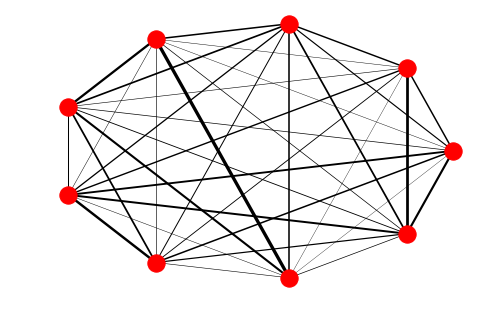

In [201]:
%matplotlib inline

pos = nx.circular_layout(G)
edges = G.edges()
weights = [G[u][v]['followers'] for u,v in edges]
nx.draw(G, pos, edges=edges, width=weights)

In [112]:
c.edge_width

'followers'

In [6]:
xx = list(r.items())[0][1]

In [15]:
G.add_node("a")

In [17]:
G.nodes()

NodeView(('a',))